<a href="https://colab.research.google.com/github/cobase2010/Online_Learning/blob/main/Machine_learning_sentdex_13_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!wget -nc https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data 

File ‘breast-cancer-wisconsin.data’ already there; not retrieving.



In [38]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import pandas as pd


df = pd.read_csv('breast-cancer-wisconsin.data', header=None)
df.columns = ['id','clump_thickness','uniform_cell_size',
'uniform_cell_shape','marginal_adhesion',
'single_epi_cell_size','bare_nuclei','bland_chromation',
'normal_nucleoli','mitoses','class']
print(len(df))

df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

699
0.9428571428571428


<ipython-input-38-bd0fef53a75e>:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['id'], 1, inplace=True)
<ipython-input-38-bd0fef53a75e>:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['class'], 1))


In [39]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]])
print(example_measures.shape)
# example_measures = example_measures.reshape(len(example_measures), -1)
# example_measures = example_measures.reshape(example_measures.shape[0], -1)
prediction = clf.predict(example_measures)
print(prediction)

(2, 9)
[2 2]


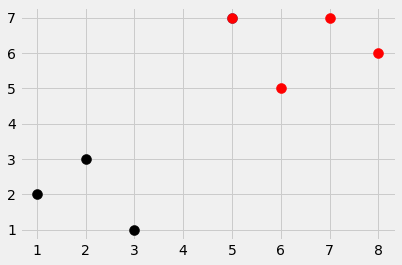

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
# same as:
##for i in dataset:
##    for ii in dataset[i]:
##        plt.scatter(ii[0],ii[1],s=100,color=i)
        
plt.scatter(new_features[0], new_features[1], s=100)

result = k_nearest_neighbors(dataset, new_features)
plt.scatter(new_features[0], new_features[1], s=100, color = result)  
plt.show()

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from collections import Counter
#dont forget this
import pandas as pd
import random
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
  
    return vote_result, confidence

df = pd.read_csv('breast-cancer-wisconsin.data', header=None)
df.columns = ['id','clump_thickness','uniform_cell_size',
'uniform_cell_shape','marginal_adhesion',
'single_epi_cell_size','bare_nuclei','bland_chromation',
'normal_nucleoli','mitoses','class']
print(len(df))
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

random.shuffle(full_data)

test_size = 0.4
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote,confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
          print("Incorrect: ", confidence)
        total += 1
print('Accuracy:', correct/total)

699
Incorrect:  0.8
Incorrect:  0.8


<ipython-input-43-7de42ae956e4>:33: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['id'], 1, inplace=True)


Incorrect:  0.6
Incorrect:  0.8
Incorrect:  1.0
Incorrect:  1.0
Incorrect:  0.8
Incorrect:  1.0
Incorrect:  0.6
Incorrect:  0.8
Incorrect:  0.6
Accuracy: 0.9605734767025089
